#  Ottawa's Traffic Collision Landscape


In [105]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler


In [82]:
# Loading data
data = pd.read_csv("C:\Documents\College\III Term\Data Analysys\Assignment03\FinalProjectGroup8Part1\Assignment3_group8.csv")

In [63]:
# Summary statistics for numerical columns
data.describe()

,Num_of_Injuries,Lat,Long
count,7203.000000,7203.000000,7203.000000
mean,0.256421,45.221929,-75.713530
std,0.577678,2.560612,0.234792
min,0.000000,0.000000,-79.237290
25%,0.000000,45.326648,-75.754473
50%,0.000000,45.375134,-75.694015
75%,0.000000,45.419309,-75.637073
max,7.000000,45.524238,-75.268806


In [64]:
data.info()
pd.DataFrame(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7203 entries, 0 to 7202
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          7203 non-null   object 
 1   Accident_Time               7203 non-null   object 
 2   Location                    7203 non-null   object 
 3   Location_Type               7203 non-null   object 
 4   Classification_Of_Accident  7203 non-null   object 
 5   Initial_Impact_Type         7203 non-null   object 
 6   Road_Surface_Condition      7203 non-null   object 
 7   Environment_Condition       7203 non-null   object 
 8   Light                       7203 non-null   object 
 9   Traffic_Control             7203 non-null   object 
 10  Max_Injury                  7203 non-null   object 
 11  Num_of_Injuries             7203 non-null   int64  
 12  Lat                         7203 non-null   float64
 13  Long                        7203 

,ID,Accident_Time,Location,Location_Type,Classification_Of_Accident,Initial_Impact_Type,Road_Surface_Condition,Environment_Condition,Light,Traffic_Control,Max_Injury,Num_of_Injuries,Lat,Long,Month,Day of Week
0,2022--65901,13:25,TERRY FOX DR @ EDGEWATER ST/CHARLIE ROGERS PL ...,Intersection,02 - Non-fatal injury,03 - Rear end,01 - Dry,01 - Clear,01 - Daylight,01 - Traffic signal,02 - Minor,1,45.296904,-75.901030,January,Sunday
1,2022--65301,9:39,ALBION RD btwn LESTER RD & LEITRIM RD (__3Z08DH),Midblock,03 - P.D. only,07 - SMV other,01 - Dry,01 - Clear,01 - Daylight,10 - No control,00 - None,0,45.331710,-75.630323,January,Monday
2,2022--65902,14:00,VANCES SIDE RD @ WOODKILTON RD (0005726),Intersection,03 - P.D. only,02 - Angle,01 - Dry,01 - Clear,01 - Daylight,02 - Stop sign,00 - None,0,45.433857,-76.061773,January,Sunday
3,2022--65903,12:04,WOODRIDGE CRES @ 220 W OF BAYSHORE DR/BAYSHORE...,Intersection,02 - Non-fatal injury,03 - Rear end,05 - Packed snow,01 - Clear,01 - Daylight,12 - IPS,02 - Minor,1,45.348244,-75.807804,January,Sunday
4,2022--65904,17:20,WOODROFFE AVE @ CRESTHAVEN DR/PAUL METIVIER (0...,Intersection,03 - P.D. only,03 - Rear end,01 - Dry,01 - Clear,05 - Dusk,02 - Stop sign,00 - None,0,45.270950,-75.715882,January,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7198,2022--72206,15:37,MCLEOD ST @ METCALFE ST (0018868),Intersection,03 - P.D. only,05 - Turning movement,01 - Dry,01 - Clear,01 - Daylight,01 - Traffic signal,00 - None,0,45.413719,-75.687625,October,Thursday
7199,2022--72207,12:01,OLD MONTREAL RD/ST. JOSEPH BLVD @ TRIM RD (001...,Intersection,03 - P.D. only,03 - Rear end,01 - Dry,01 - Clear,01 - Daylight,11 - Roundabout,00 - None,0,45.488982,-75.477743,October,Thursday
7200,2022--72208,15:18,9TH LINE RD @ VICTORIA ST (0001624),Intersection,02 - Non-fatal injury,02 - Angle,01 - Dry,01 - Clear,01 - Daylight,02 - Stop sign,03 - Major,1,45.245051,-75.451210,October,Friday
7201,2022--72209,15:00,AIRPORT PKWY btwn AIRPORT PKWY/BROOKFIELD RAMP...,Midblock,03 - P.D. only,07 - SMV other,01 - Dry,01 - Clear,01 - Daylight,10 - No control,00 - None,0,45.377401,-75.684132,October,Friday


In [98]:
# Counts of accidents by Num of Injuries
data['Num_of_Injuries'].value_counts()

0    5756
1    1129
2     257
3      48
4       8
5       3
7       1
6       1
Name: Num_of_Injuries, dtype: int64

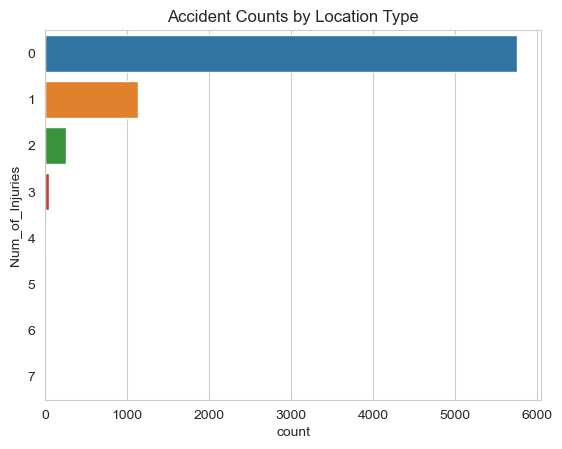

In [99]:
# Bar chart for Num of Injuries
sns.countplot(y='Num_of_Injuries', data=data)
plt.title('Accident Counts by Location Type')
plt.show()

In [103]:
# Filter rows where 'Num_of_Injuries' is 4, 5, 6, 7
rows_with_specific_injuries = data[data['Num_of_Injuries'].isin([4, 5, 6, 7])]

pd.DataFrame(rows_with_specific_injuries).sort_index()

,Accident_Time,Location,Location_Type,Classification_Of_Accident,Initial_Impact_Type,Road_Surface_Condition,Environment_Condition,Light,Traffic_Control,Max_Injury,Num_of_Injuries,Lat,Long,Month,Day of Week
ID,,,,,,,,,,,,,,,
2022--66153,21:58,HAWTHORNE RD @ HUNT CLUB RD (0007651),Intersection,02 - Non-fatal injury,02 - Angle,02 - Wet,01 - Clear,07 - Dark,01 - Traffic signal,02 - Minor,5,45.374030,-75.597243,January,Sunday
2022--66850,18:45,BAYSHORE DR @ RICHMOND RD (0010407),Intersection,02 - Non-fatal injury,03 - Rear end,03 - Loose snow,01 - Clear,07 - Dark,01 - Traffic signal,01 - Minimal,4,45.348140,-75.803565,February,Friday
2022--67500,6:57,HIGHWAY 417 btwn HWY417 IC112 RAMP55 & GL/OO B...,Midblock,02 - Non-fatal injury,03 - Rear end,02 - Wet,01 - Clear,01 - Daylight,10 - No control,02 - Minor,5,45.412210,-75.602936,March,Thursday
2022--68658,17:09,STAGECOACH RD @ SUNCREST DR/JACK PINE CRES S (...,Intersection,02 - Non-fatal injury,05 - Turning movement,01 - Dry,01 - Clear,01 - Daylight,02 - Stop sign,02 - Minor,7,45.255362,-75.593303,April,Saturday
2022--68741,18:22,ALBION RD @ MITCH OWENS RD (0004212),Intersection,02 - Non-fatal injury,05 - Turning movement,01 - Dry,01 - Clear,01 - Daylight,01 - Traffic signal,02 - Minor,4,45.269602,-75.593815,May,Thursday
2022--69943,10:54,BASELINE RD @ MERIVALE RD (0002342),Intersection,01 - Fatal injury,02 - Angle,01 - Dry,01 - Clear,01 - Daylight,01 - Traffic signal,04 - Fatal,4,45.365283,-75.730821,July,Friday
2022--70618,4:08,REGIONAL ROAD 174 btwn REGIONAL ROAD 174 SPLIT...,Midblock,02 - Non-fatal injury,01 - Approaching,02 - Wet,02 - Rain,07 - Dark,10 - No control,03 - Major,4,45.509103,-75.467003,August,Monday
2022--70678,12:37,FALLOWFIELD RD @ WOODROFFE AVE (0010372),Intersection,02 - Non-fatal injury,02 - Angle,01 - Dry,01 - Clear,01 - Daylight,01 - Traffic signal,03 - Major,5,45.298481,-75.731336,August,Thursday
2022--70812,17:58,BANK ST @ DALMENY RD/MARVELVILLE RD (0001081),Intersection,02 - Non-fatal injury,02 - Angle,01 - Dry,01 - Clear,01 - Daylight,02 - Stop sign,02 - Minor,6,45.174631,-75.469087,August,Thursday


In [65]:
# Counts of accidents by Location Type
data['Location_Type'].value_counts()

Intersection    4836
Midblock        2367
Name: Location_Type, dtype: int64

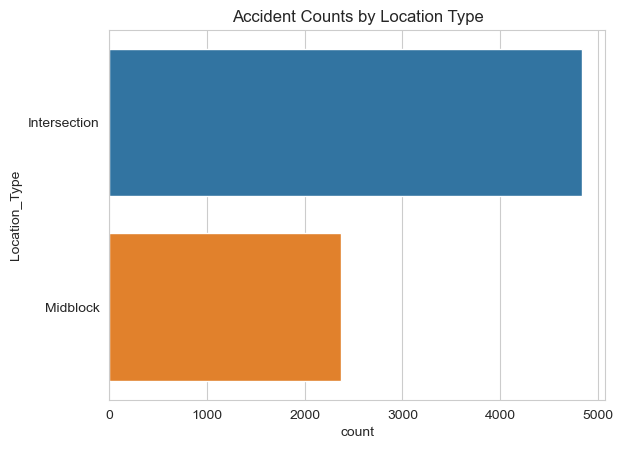

In [66]:
# Bar chart for Location Type distribution
sns.countplot(y='Location_Type', data=data)
plt.title('Accident Counts by Location Type')
plt.show()

In [67]:
data['Initial_Impact_Type'].value_counts()

03 - Rear end                  2534
02 - Angle                     1147
07 - SMV other                 1015
04 - Sideswipe                 1002
05 - Turning movement           859
06 - SMV unattended vehicle     344
99 - Other                      216
01 - Approaching                 85
00 - unknown                      1
Name: Initial_Impact_Type, dtype: int64

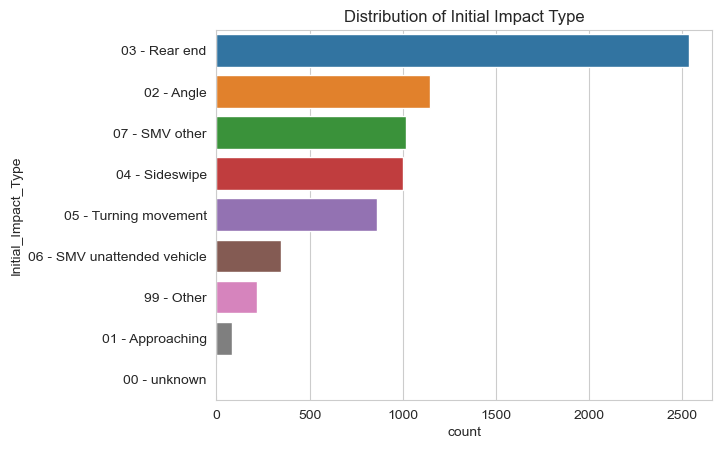

In [68]:
# Initial Impact Type
sns.countplot(y='Initial_Impact_Type', data=data, order = data['Initial_Impact_Type'].value_counts().index)
plt.title('Distribution of Initial Impact Type')
plt.show()

In [69]:
data['Classification_Of_Accident'].value_counts().sort_index()

01 - Fatal injury          18
02 - Non-fatal injury    1429
03 - P.D. only           5756
Name: Classification_Of_Accident, dtype: int64

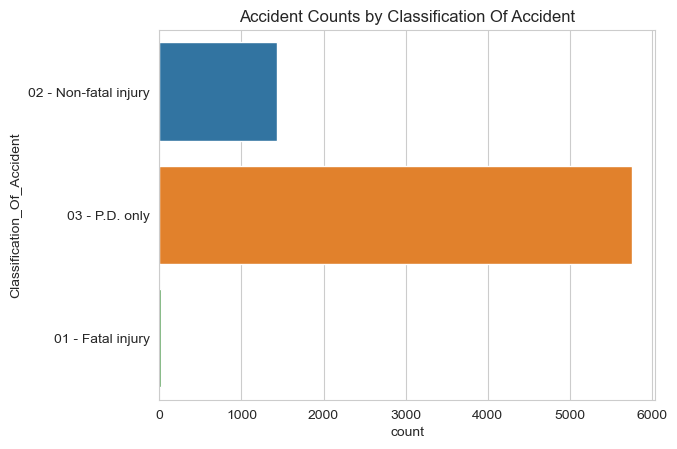

In [70]:
# Bar chart for Classification Of Accident distribution
sns.countplot(y='Classification_Of_Accident', data=data)
plt.title('Accident Counts by Classification Of Accident')
plt.show()

In [84]:
# Accidents per Month
data['Month'].value_counts()

February     1183
January      1086
March         708
May           674
September     646
June          606
April         574
August        573
October       557
July          553
November       29
December       14
Name: Month, dtype: int64

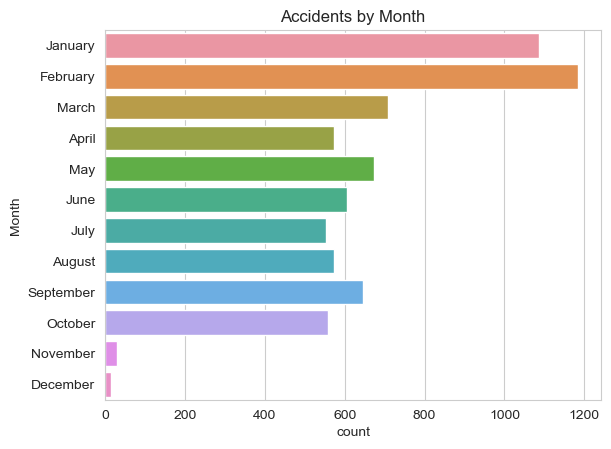

In [72]:
# Accidents per Month
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
sns.countplot(y='Month', data=data, order=month_order)
plt.title('Accidents by Month')
plt.show()

In [85]:
# Accidents by Day of the Week
data['Day of Week'].value_counts()

Friday       1412
Tuesday      1118
Thursday     1068
Saturday     1000
Wednesday     999
Monday        945
Sunday        661
Name: Day of Week, dtype: int64

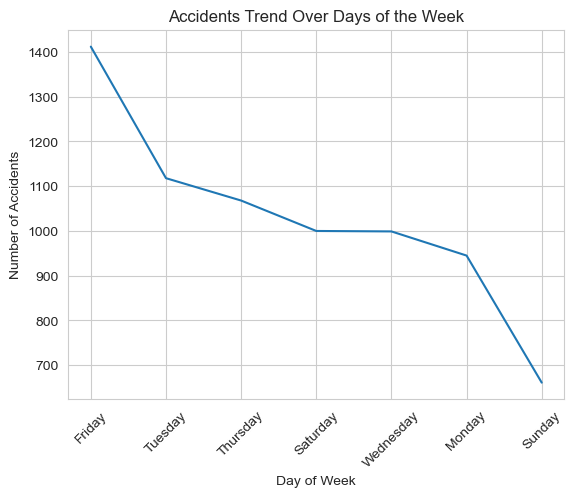

In [88]:
# Line graph for accidents over days of the week
week_day_trends = data['Day of Week'].value_counts()
week_day_trends.plot(kind='line')
plt.title('Accidents Trend Over Days of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

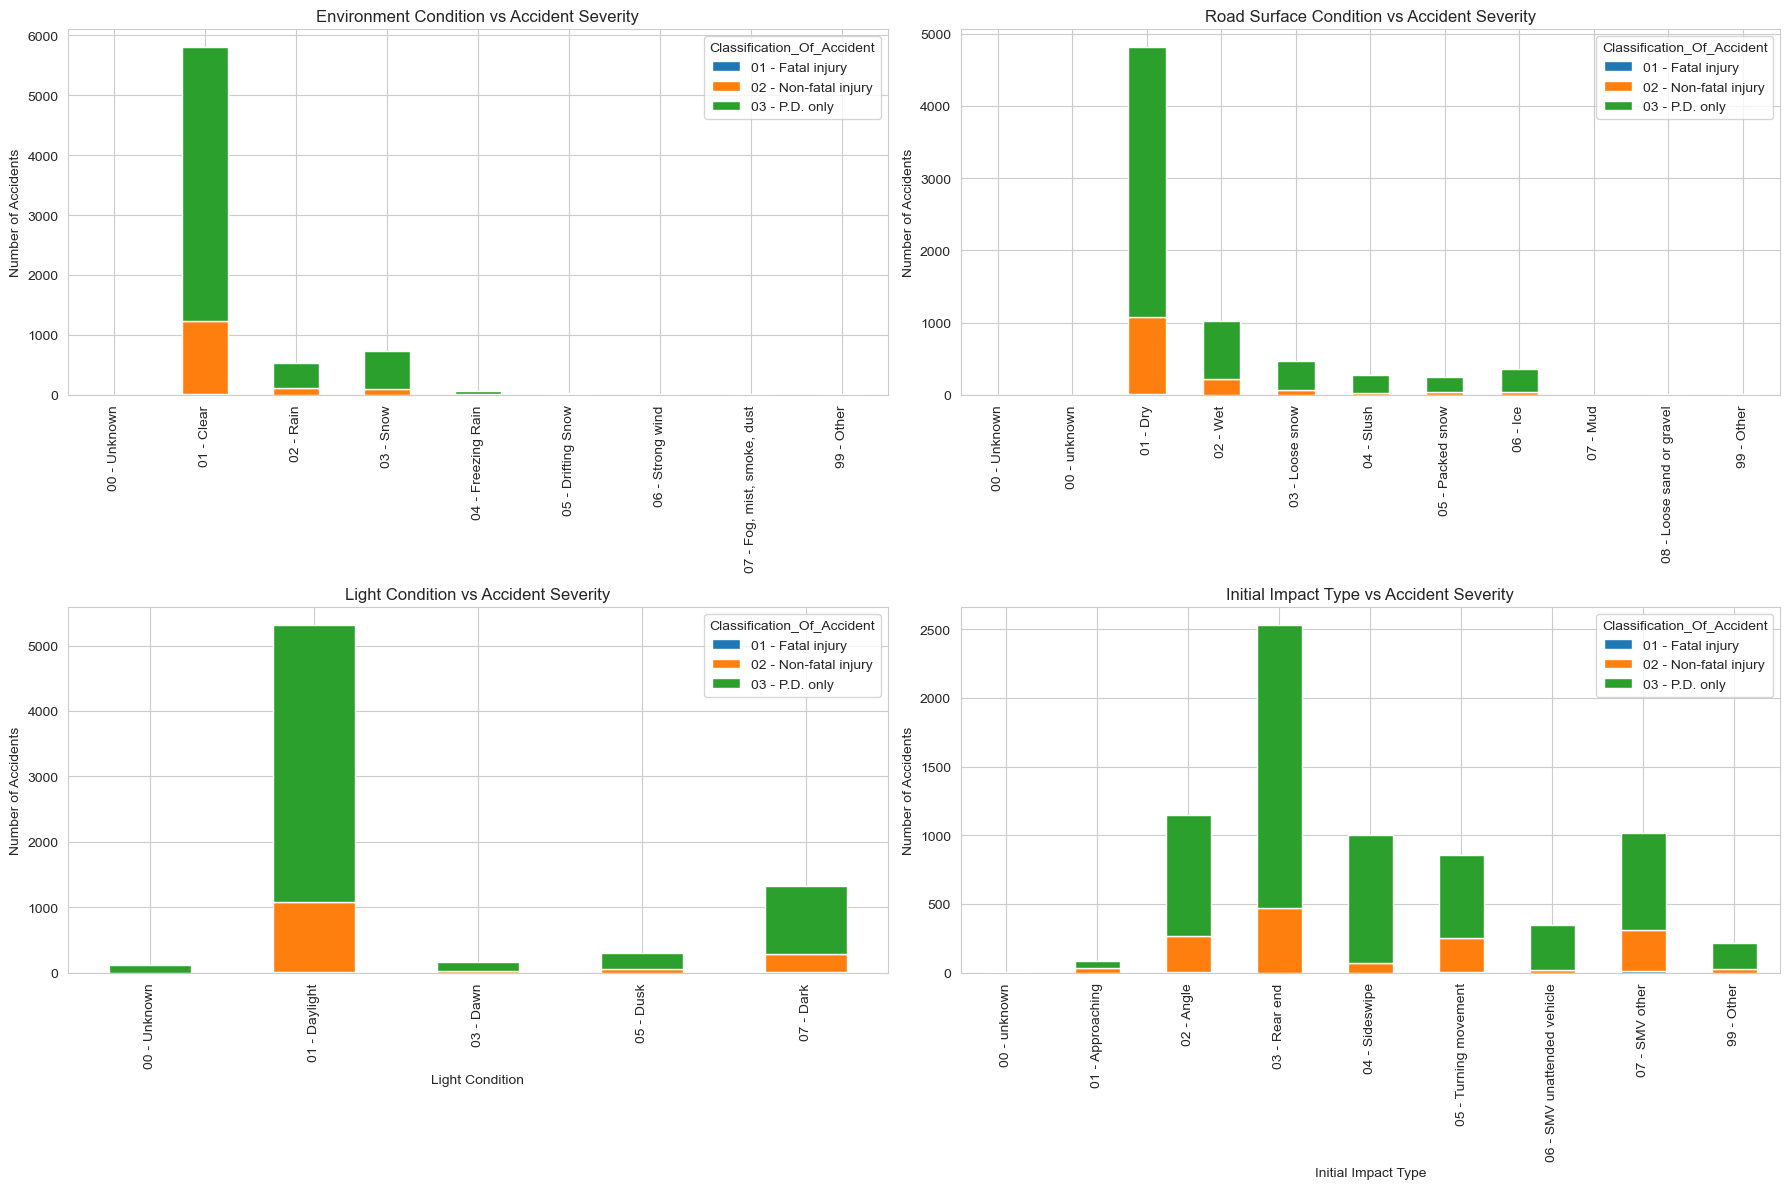

In [89]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Analysis 1: Identifying the most dangerous conditions to drive
# Environment Condition and Accident Severity
env_accident_severity = data.groupby(['Environment_Condition', 'Classification_Of_Accident']).size().unstack(fill_value=0)

# Road Surface Condition and Accident Severity
road_surface_accident_severity = data.groupby(['Road_Surface_Condition', 'Classification_Of_Accident']).size().unstack(fill_value=0)

# Light Condition and Accident Severity
light_accident_severity = data.groupby(['Light', 'Classification_Of_Accident']).size().unstack(fill_value=0)

# Initial Impact Type and Accident Severity
impact_accident_severity = data.groupby(['Initial_Impact_Type', 'Classification_Of_Accident']).size().unstack(fill_value=0)

# Plotting the Analysis 1 results
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
env_accident_severity.plot(kind='bar', ax=axs[0, 0], stacked=True)
road_surface_accident_severity.plot(kind='bar', ax=axs[0, 1], stacked=True)
light_accident_severity.plot(kind='bar', ax=axs[1, 0], stacked=True)
impact_accident_severity.plot(kind='bar', ax=axs[1, 1], stacked=True)
axs[0, 0].set_title('Environment Condition vs Accident Severity')
axs[0, 1].set_title('Road Surface Condition vs Accident Severity')
axs[1, 0].set_title('Light Condition vs Accident Severity')
axs[1, 1].set_title('Initial Impact Type vs Accident Severity')
for ax in axs.flat:
    ax.set(ylabel='Number of Accidents', xlabel='')
axs[1, 0].set_xlabel('Light Condition')
axs[1, 1].set_xlabel('Initial Impact Type')
plt.tight_layout()

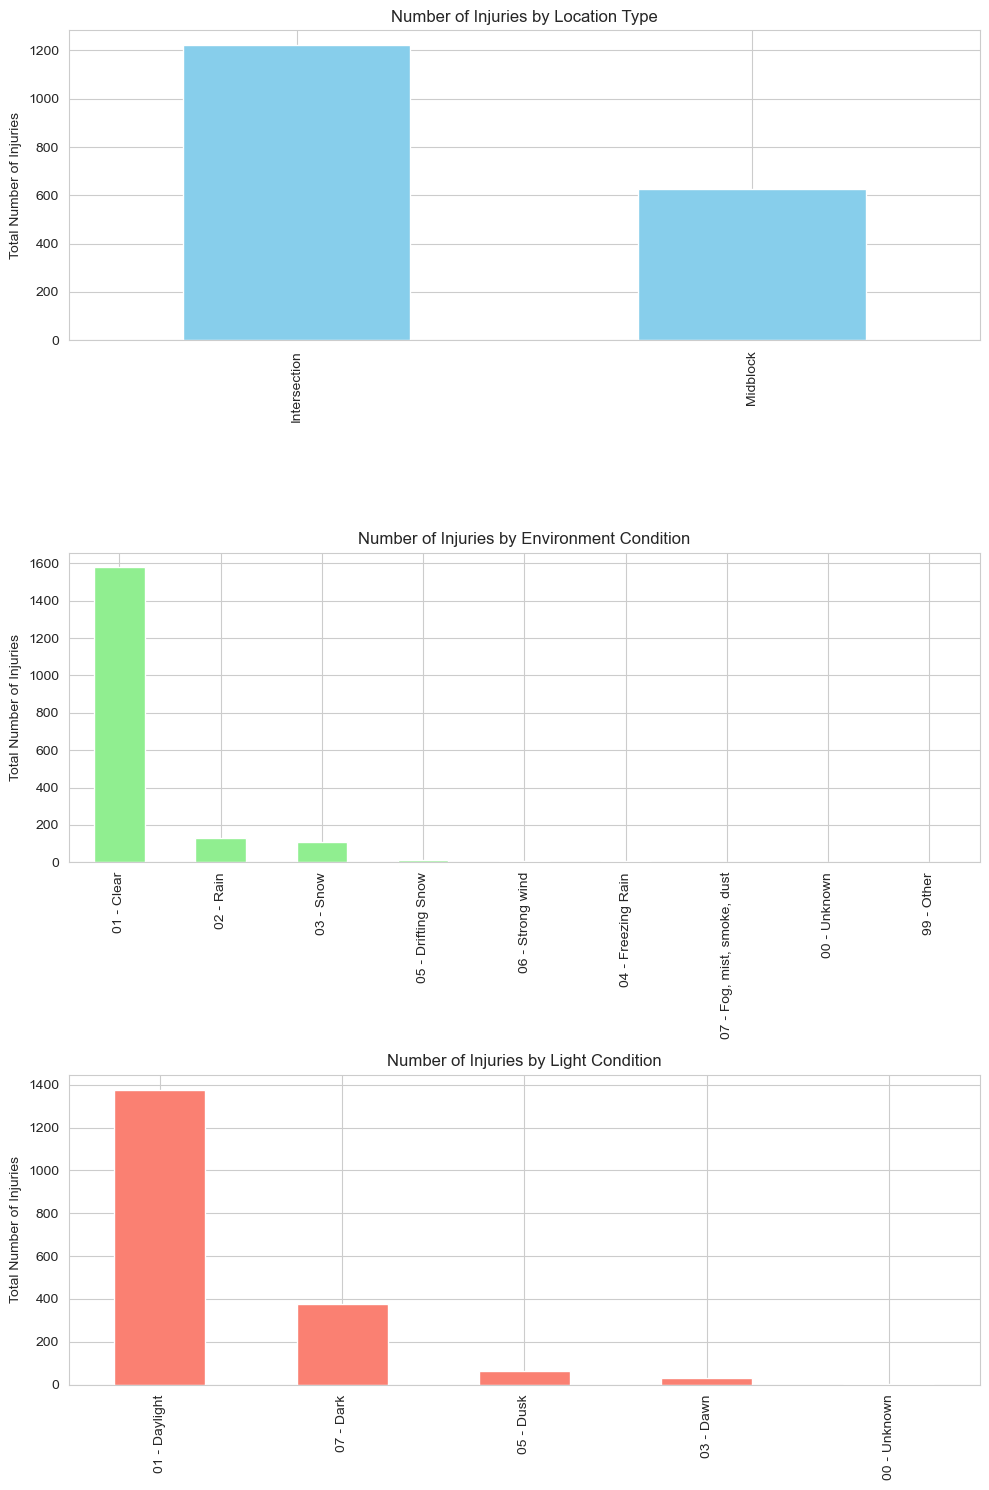

In [76]:
# Number of injuries and their occurrences by different factors
# Summarizing total number of injuries
total_injuries = data['Num_of_Injuries'].sum()
# Injuries by Location Type
injuries_by_location = data.groupby('Location_Type')['Num_of_Injuries'].sum().sort_values(ascending=False)
# Injuries by Environment Condition
injuries_by_environment = data.groupby('Environment_Condition')['Num_of_Injuries'].sum().sort_values(ascending=False)
# Injuries by Light Condition
injuries_by_light = data.groupby('Light')['Num_of_Injuries'].sum().sort_values(ascending=False)

# Plotting the results
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
injuries_by_location.plot(kind='bar', ax=axs[0], color='skyblue')
injuries_by_environment.plot(kind='bar', ax=axs[1], color='lightgreen')
injuries_by_light.plot(kind='bar', ax=axs[2], color='salmon')
axs[0].set_title('Number of Injuries by Location Type')
axs[1].set_title('Number of Injuries by Environment Condition')
axs[2].set_title('Number of Injuries by Light Condition')
for ax in axs.flat:
    ax.set(ylabel='Total Number of Injuries', xlabel='')
plt.tight_layout()

<Figure size 1200x800 with 0 Axes>

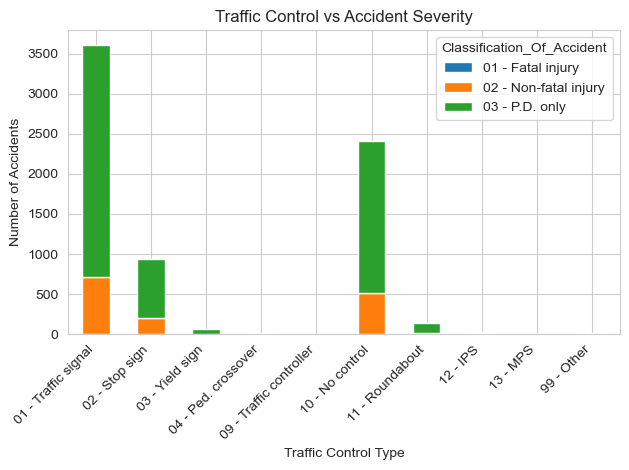

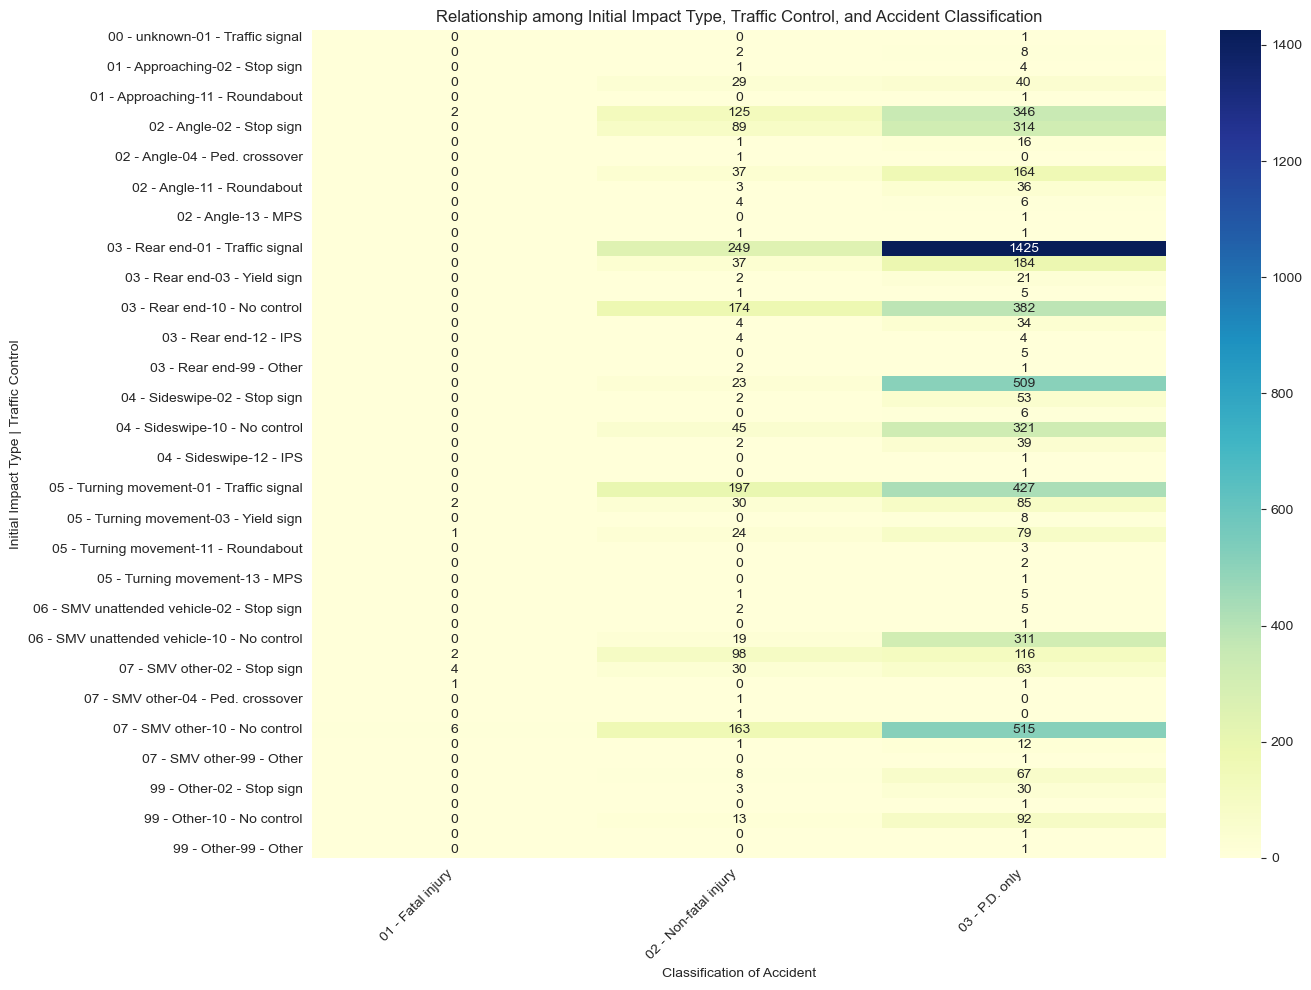

In [90]:
# Analysis involving Traffic Control and Accident Severity
traffic_control_severity = data.groupby(['Traffic_Control', 'Classification_Of_Accident']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
traffic_control_severity.plot(kind='bar', stacked=True)
plt.title('Traffic Control vs Accident Severity')
plt.ylabel('Number of Accidents')
plt.xlabel('Traffic Control Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Relationship among Initial Impact Type, Traffic Control, and Classification of Accident
relationship_analysis = pd.pivot_table(data, values='ID', index=['Initial_Impact_Type', 'Traffic_Control'],
                                       columns='Classification_Of_Accident', aggfunc='count', fill_value=0)
plt.figure(figsize=(14, 10))
sns.heatmap(relationship_analysis, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Relationship among Initial Impact Type, Traffic Control, and Accident Classification')
plt.ylabel('Initial Impact Type | Traffic Control')
plt.xlabel('Classification of Accident')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

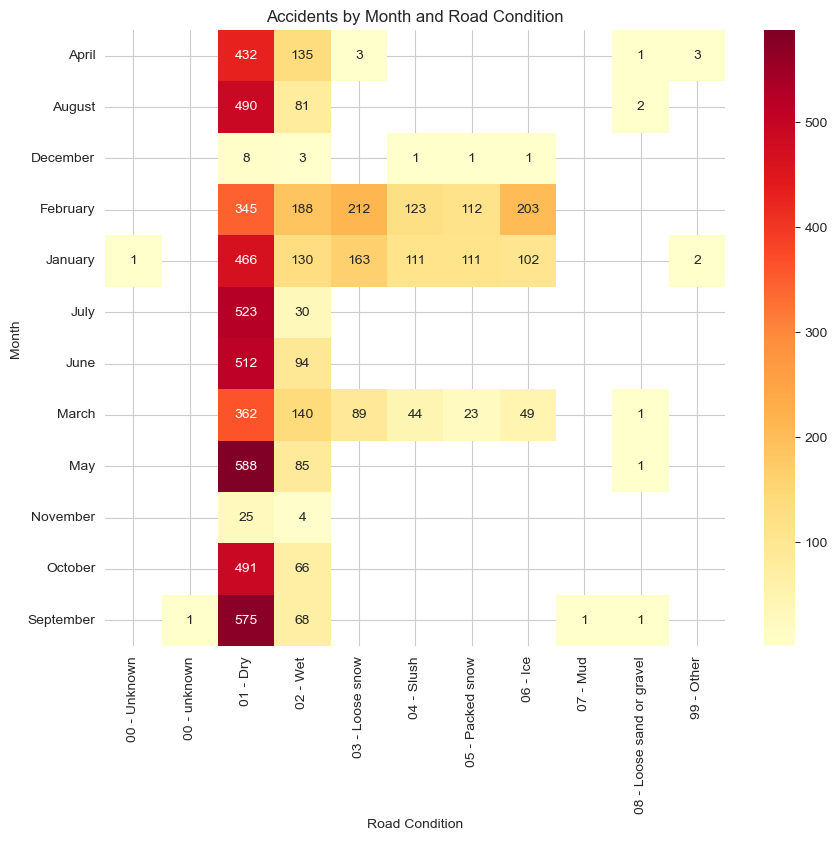

In [78]:
# Simple heatmap visualization based on Road Condition and month with the number of accidents
pivot_table = pd.pivot_table(data, index='Month', columns='Road_Surface_Condition', values='ID', aggfunc='count')


plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title('Accidents by Month and Road Condition')
plt.ylabel('Month')
plt.xlabel('Road Condition')
plt.show()